In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import plugins
from datetime import datetime, timezone

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LocationData-GNSS-[20230501-20231024].csv to LocationData-GNSS-[20230501-20231024].csv


# Descriptive Statistics (Data Overview + Data Cleaning)

## Maverick

In [ ]:
bird1 = pd.read_csv("WNYRWC01-7262.csv") # Maverick

In [ ]:
bird1['timestamp'] = pd.to_datetime(bird1['timestamp'])
bird1['timestamp'].min()

Timestamp('2021-03-17 19:10:26')

In [ ]:
bird1 = bird1[bird1['timestamp'] >= '2021-09-01'] # Release date is on Sep 2021

# Find the minimum and maximum timestamps
min_timestamp = bird1['timestamp'].min()
max_timestamp = bird1['timestamp'].max()

# Calculate the duration
duration = max_timestamp - min_timestamp

print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)
print("Days since banded:", (datetime.now() - datetime.strptime('2021-09-01', '%Y-%m-%d')).days, "days")
print("Days pinged:", bird1['timestamp'].dt.date.nunique(), "days")

Minimum Timestamp: 2021-09-29 17:58:31
Maximum Timestamp: 2023-08-19 20:57:02
Days since banded: 831 days
Days pinged: 300 days


## Moe

In [ ]:
bird2 = pd.read_csv("WNYRWC02-9422.csv") # Mo (dead)
bird2 = bird2[(bird2['location-lat'] < 42.8) & (bird2['location-long'] < -78.74)] # Outliers (birds being relocated to release location)

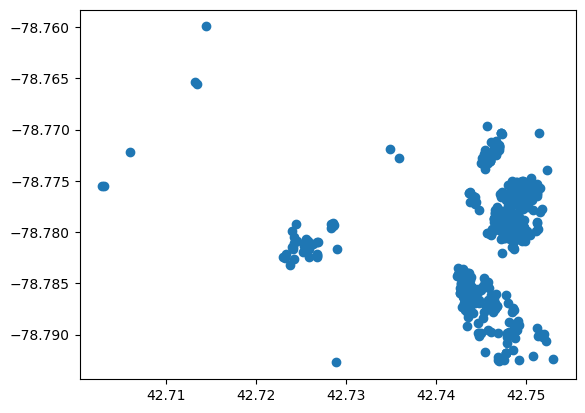

In [ ]:
plt.scatter(bird2['location-lat'],bird2['location-long'])

In [ ]:
bird2['timestamp'] = pd.to_datetime(bird2['timestamp'])

# Find the minimum and maximum timestamps
min_timestamp = bird2['timestamp'].min()
max_timestamp = bird2['timestamp'].max()

# Calculate the duration
duration = max_timestamp - min_timestamp

print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)
print("Days since banded:", (datetime.now() - min_timestamp).days, "days")
print("Days pinged:", bird2['timestamp'].dt.date.nunique(), "days")

Minimum Timestamp: 2022-09-21 21:00:11
Maximum Timestamp: 2022-12-05 21:00:24
Days since banded: 445 days
Days pinged: 74 days


## McDonnell

In [ ]:
bird3 = pd.read_csv("LocationData-GNSS-[20230501-20231024].csv")

In [ ]:
bird3 = bird3[bird3['Longitude'] != 200] # placeholders irrelevant info

In [ ]:
bird3['Collecting time']= pd.to_datetime(bird3['Collecting time'])
bird3['Transmitting time']= pd.to_datetime(bird3['Transmitting time'])

In [ ]:
bird3['Collecting time'].dt.date.nunique()

165

In [ ]:
bird3.columns

Index(['UUID', 'Transmitting time', 'Collecting time', 'Longitude', 'Latitude',
       'Altitude', 'Altitude (Ellipsoid)', 'Speed', 'Course', 'Satellite used',
       'Positioning mode', 'HorAccuracy', 'VerAccuracy',
       'GPS time consumption', 'Data Source', 'HDOP', 'VDOP'],
      dtype='object')

In [ ]:
# Find the minimum and maximum timestamps
min_timestamp = bird3['Transmitting time'].min()
max_timestamp = bird3['Transmitting time'].max()

# Calculate the duration
duration = max_timestamp - min_timestamp
# Get the current date in UTC timezone
current_date_utc = datetime.now(timezone.utc)

# Convert 'current_date' to UTC timezone
current_date_utc = current_date_utc.replace(tzinfo=timezone.utc)
# Get the current date in UTC timezone

print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)
print("Duration of McDonnell since first ping:", duration.days, "days")
print("Days since released:", (current_date_utc-min_timestamp).days, "days")
print("Days pinged:", bird3['Collecting time'].dt.date.nunique(), "days")

Minimum Timestamp: 2023-05-04 16:01:10.177000+00:00
Maximum Timestamp: 2023-10-12 16:01:09.804000+00:00
Duration of McDonnell since first ping: 160 days
Days since released: 221 days
Days pinged: 165 days


In [ ]:
bird3['Transmitting time'].dt.date.nunique()

165

# Maps:

## Maverick's map

In [ ]:
bird_map = folium.Map(location=[bird1['location-lat'].mean(), bird1['location-long'].mean()], zoom_start=10)

# Create a polyline representing the bird's route
route = [(row['location-lat'], row['location-long']) for index, row in bird1.iterrows()]
folium.PolyLine(locations=route, color="blue", weight=5, opacity=0.7).add_to(bird_map)

# Add marker for initial destination (first point in the route)
folium.Marker(location=route[0], icon=folium.Icon(color='green')).add_to(bird_map)

# Add marker for final destination (last point in the route)
folium.Marker(location=route[-1], icon=folium.Icon(color='red')).add_to(bird_map)

# Save the map to a temporary HTML file
bird_map

## Mo's map

In [ ]:
bird_map = folium.Map(location=[bird2['location-lat'].mean(), bird2['location-long'].mean()], zoom_start=10)

# Create a polyline representing the bird's route
route = [(row['location-lat'], row['location-long']) for index, row in bird2.iterrows()]
folium.PolyLine(locations=route, color="blue", weight=5, opacity=0.7).add_to(bird_map)

# Add marker for initial destination (first point in the route)
folium.Marker(location=route[0], icon=folium.Icon(color='green')).add_to(bird_map)

# Add marker for final destination (last point in the route)
folium.Marker(location=route[-1], icon=folium.Icon(color='red')).add_to(bird_map)

# Save the map to an HTML file
bird_map

## Mcdonnell's map

In [ ]:
bird_map = folium.Map(location=[bird3['Latitude'].mean(), bird3['Longitude'].mean()], zoom_start=10)

# Create a polyline representing the bird's route
route = [(row['Latitude'], row['Longitude']) for index, row in bird3.iterrows()]
folium.PolyLine(locations=route, color="blue", weight=5, opacity=0.7).add_to(bird_map)

# Add marker for initial destination (first point in the route)
folium.Marker(location=route[0], icon=folium.Icon(color='green')).add_to(bird_map)

# Add marker for final destination (last point in the route)
folium.Marker(location=route[-1], icon=folium.Icon(color='red')).add_to(bird_map)

# Save the map to an HTML file
bird_map